## Required Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

## Loading the Data

In [2]:
merged_data = pd.read_csv('C:/Users/39351/github/Eu_healthcare_spending_analysis/data/cleaned/merged_eu_health_data.csv')
# merged_data.head()

## Research questions 

#### *Is there a statistically significant relationship between health spending and life expectancy in EU countries over time?*

### Inspect the Data 

In [3]:
merged_data.info()
merged_data.isnull().sum()
merged_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152307 entries, 0 to 152306
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         152307 non-null  int64  
 1   Country Code       152307 non-null  object 
 2   Country Name       152307 non-null  object 
 3   Year               152307 non-null  int64  
 4   Spending Unit      152307 non-null  object 
 5   Financing Code     152307 non-null  object 
 6   Category           152307 non-null  object 
 7   Spending           152307 non-null  float64
 8   Gender             152307 non-null  object 
 9   Age Class          152307 non-null  object 
 10  Life Expectancy    152307 non-null  float64
 11  Type of Mortality  152307 non-null  object 
 12  Diseas             152307 non-null  object 
 13  Mortality Rate     152307 non-null  float64
dtypes: float64(3), int64(2), object(9)
memory usage: 16.3+ MB


,Unnamed: 0,Year,Spending,Life Expectancy,Mortality Rate
count,152307.000000,152307.000000,152307.000000,152307.000000,152307.000000
mean,76153.000000,2017.198960,547.863881,78.390890,197.180124
std,43967.388062,3.094793,1262.208507,4.049032,149.802032
min,0.000000,2012.000000,0.000000,64.100000,33.120000
25%,38076.500000,2015.000000,0.000000,76.300000,90.170000
50%,76153.000000,2017.000000,47.290000,79.100000,158.310000
75%,114229.500000,2020.000000,471.660000,81.300000,240.900000
max,152306.000000,2022.000000,10374.050000,86.700000,1000.630000


### Visual Exploration 

Visualize the potential correlation:

<Figure size 1000x600 with 0 Axes>

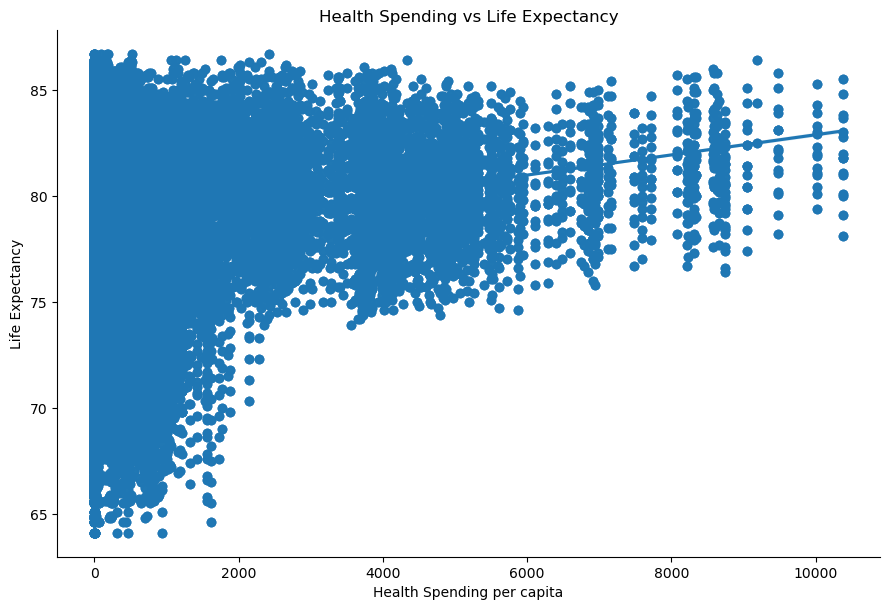

In [4]:
## regression Line

plt.figure(figsize=(10, 6))
sns.lmplot(data=merged_data, x= 'Spending', y='Life Expectancy', height=6, aspect=1.5)
plt.title('Health Spending vs Life Expectancy')
plt.xlabel('Health Spending per capita')
plt.ylabel('Life Expectancy')
plt.show()

### Correlation Analysis
 Pearson correlation for linear trends

In [5]:
corr = merged_data[['Spending', 'Life Expectancy']].corr
print(corr)


<bound method DataFrame.corr of         Spending  Life Expectancy
0        1678.79             82.8
1        1678.79             82.8
2        1678.79             82.8
3        1678.79             81.9
4        1678.79             81.9
...          ...              ...
152302    998.98             73.2
152303    998.98             73.2
152304    998.98             76.7
152305    998.98             76.7
152306    998.98             76.7

[152307 rows x 2 columns]>


### Linear Regression

In [6]:
reg_data = merged_data[['Spending', 'Life Expectancy']].dropna()

## Defining the dependent and independent variables
x = reg_data['Spending']
y = reg_data['Life Expectancy']


x = sm.add_constant(x)    # Adding Constant to the model

reg_model = sm.OLS(y, x).fit()

reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life Expectancy   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     3421.
Date:                Sat, 26 Jul 2025   Prob (F-statistic):               0.00
Time:                        15:19:40   Log-Likelihood:            -4.2742e+05
No. Observations:              152307   AIC:                         8.548e+05
Df Residuals:                  152305   BIC:                         8.549e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         78.1304      0.011   6985.043      0.000      78.108      78.152
Spending       0.0005   8.13e-06     58.489      0.000       0.000       0.000
==============================================================================
Omnibus:                    12070.095   Durbin-Watson:                   0.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15130.003
Skew:                          -0.759   Prob(JB):                         0.00
Kurtosis:                       3.278   Cond. No.                     1.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Visualize the relations and check the Distribution and Outliers

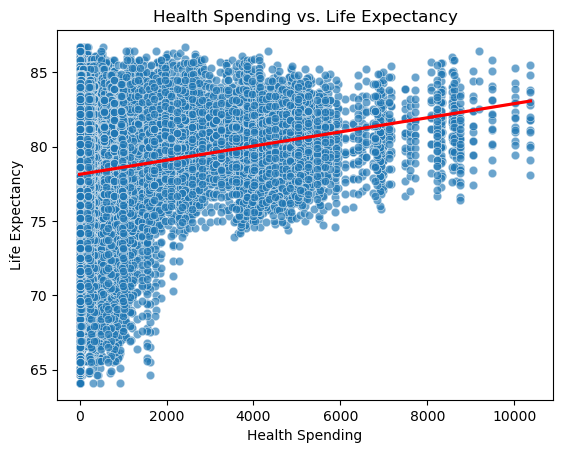

In [7]:
sns.scatterplot(data= merged_data, x='Spending', y = 'Life Expectancy', alpha=0.3)
sns.regplot(data=merged_data, x='Spending', y='Life Expectancy', scatter=False, color='red')
plt.title('Health Spending vs. Life Expectancy')
plt.xlabel('Health Spending')
plt.show()

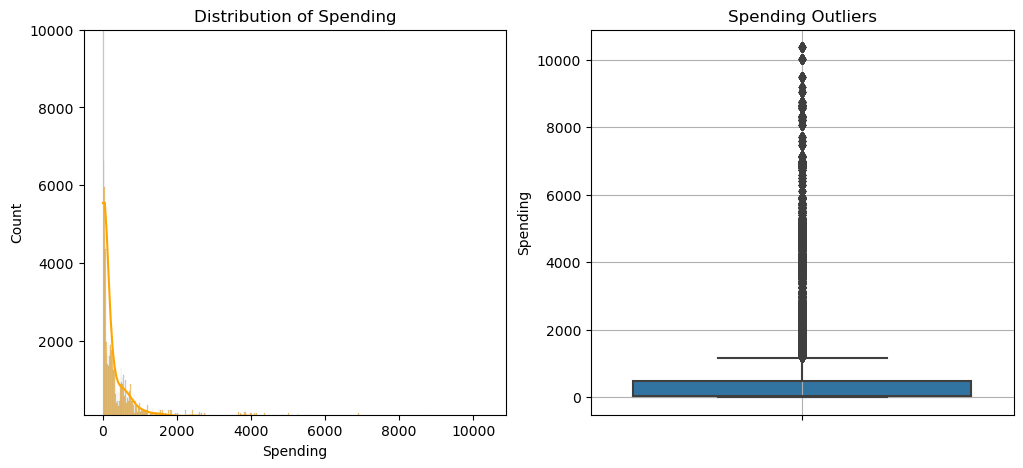

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(merged_data['Spending'], kde=True, ax=axes[0], color='Orange')
axes[0].set_title('Distribution of Spending')
axes[1].grid(True)
axes[0].set_ylim(100, 10000)

sns.boxplot(y=merged_data['Spending'], ax=axes[1])
axes[1].set_title('Spending Outliers')
axes[1].grid(True)
plt.show()

## Ckeck for Correlation and Multicollinearity

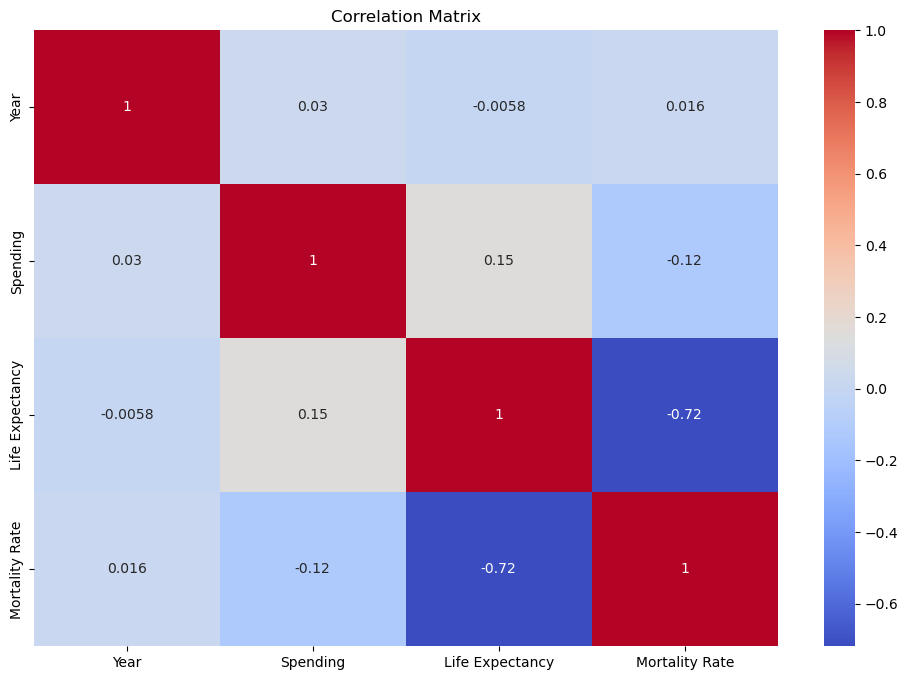

In [9]:
merged_data.drop(columns=['Unnamed: 0'], inplace=True)
corr = merged_data.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

##  Detect multicollinearity (**Variance Inflation Factor (VIF)**)

In [10]:
# Define more predictors
x = merged_data[['Spending', 'Year', 'Age Class', 'Gender']]

# Turn the categorical variables into dummy variables
x = pd.get_dummies(x, drop_first=True).astype(int)
x = x.dropna()


# Calculate VIF
vif = pd.DataFrame()
vif['features'] = x.columns
vif['VIF'] =  [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
print(vif)

                     features       VIF
0                    Spending  0.002147
1                        Year  0.014822
2           Age Class_2 years  1.999988
3           Age Class_3 years  1.999988
4           Age Class_4 years  1.999988
5  Age Class_Less than 1 year  2.003848
6                    Gender_M  1.999993
7                    Gender_T  1.999993


## Fit the Multivariates OLS model

No multicollinearity found in Spending variable, and a very low multicollinearity at an acceptable rate in the other predictors. 

In [11]:

# Define the independent variables and the target
X = pd.get_dummies(merged_data[['Spending', 'Year', 'Age Class', 'Gender']], drop_first=True).astype(int) # use drop_first to avoid dummy variable trap

X = sm.add_constant(X)  # add constant for intercept
y = merged_data['Life Expectancy']

# Drop missing values (if any)
X = X.loc[y.notnull()]
y = y.loc[y.notnull()]

# Fit OLS regression
model = sm.OLS(y, X).fit()

# Show summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        Life Expectancy   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                 1.489e+04
Date:                Sat, 26 Jul 2025   Prob (F-statistic):               0.00
Time:                        15:20:19   Log-Likelihood:            -3.8512e+05
No. Observations:              152307   AIC:                         7.703e+05
Df Residuals:                  152298   BIC:                         7.703e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               